In [1]:
import torch
import torch.nn as nn
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
device

device(type='cuda')

In [3]:
start = 0
end = 10
step = 0.02
X = torch.arange(start, end, step)

X

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800, 1.0000, 1.0200, 1.0400, 1.0600,
        1.0800, 1.1000, 1.1200, 1.1400, 1.1600, 1.1800, 1.2000, 1.2200, 1.2400,
        1.2600, 1.2800, 1.3000, 1.3200, 1.3400, 1.3600, 1.3800, 1.4000, 1.4200,
        1.4400, 1.4600, 1.4800, 1.5000, 1.5200, 1.5400, 1.5600, 1.5800, 1.6000,
        1.6200, 1.6400, 1.6600, 1.6800, 1.7000, 1.7200, 1.7400, 1.7600, 1.7800,
        1.8000, 1.8200, 1.8400, 1.8600, 1.8800, 1.9000, 1.9200, 1.9400, 1.9600,
        1.9800, 2.0000, 2.0200, 2.0400, 2.0600, 2.0800, 2.1000, 2.1200, 2.1400,
        2.1600, 2.1800, 2.2000, 2.2200, 

In [4]:
X.size()

torch.Size([500])

In [5]:
X = X.unsqueeze(dim = 1)
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800],
        [1.0000],
        [1.0200],
        [1.0400],
        [1.0600],
        [1.0800],
        [1

In [6]:
weight = 3.0
bias = 7.0

In [7]:
Y = weight * X + bias
Y

tensor([[ 7.0000],
        [ 7.0600],
        [ 7.1200],
        [ 7.1800],
        [ 7.2400],
        [ 7.3000],
        [ 7.3600],
        [ 7.4200],
        [ 7.4800],
        [ 7.5400],
        [ 7.6000],
        [ 7.6600],
        [ 7.7200],
        [ 7.7800],
        [ 7.8400],
        [ 7.9000],
        [ 7.9600],
        [ 8.0200],
        [ 8.0800],
        [ 8.1400],
        [ 8.2000],
        [ 8.2600],
        [ 8.3200],
        [ 8.3800],
        [ 8.4400],
        [ 8.5000],
        [ 8.5600],
        [ 8.6200],
        [ 8.6800],
        [ 8.7400],
        [ 8.8000],
        [ 8.8600],
        [ 8.9200],
        [ 8.9800],
        [ 9.0400],
        [ 9.1000],
        [ 9.1600],
        [ 9.2200],
        [ 9.2800],
        [ 9.3400],
        [ 9.4000],
        [ 9.4600],
        [ 9.5200],
        [ 9.5800],
        [ 9.6400],
        [ 9.7000],
        [ 9.7600],
        [ 9.8200],
        [ 9.8800],
        [ 9.9400],
        [10.0000],
        [10.0600],
        [10.

In [8]:
train_split = 0.8
train_size = int(train_split*X.size(0))

In [9]:
x_train = X[:train_size]
x_test = X[train_size:]
y_train = Y[:train_size]
y_test = Y[train_size:]

x_train.size(), x_test.size(), y_train.size(), y_test.size()

(torch.Size([400, 1]),
 torch.Size([100, 1]),
 torch.Size([400, 1]),
 torch.Size([100, 1]))

In [10]:
import matplotlib.pyplot as plt

def plot_predictions(train_data = x_train,
                     test_data = x_test,
                     train_labels = y_train,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize = (10, 6))
    plt.scatter(train_data, train_labels, c = "b", label = "Training data")

    plt.scatter(test_data, test_labels, c = "g", label = "Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c = "r", label = "Predictions")

    plt.legend()

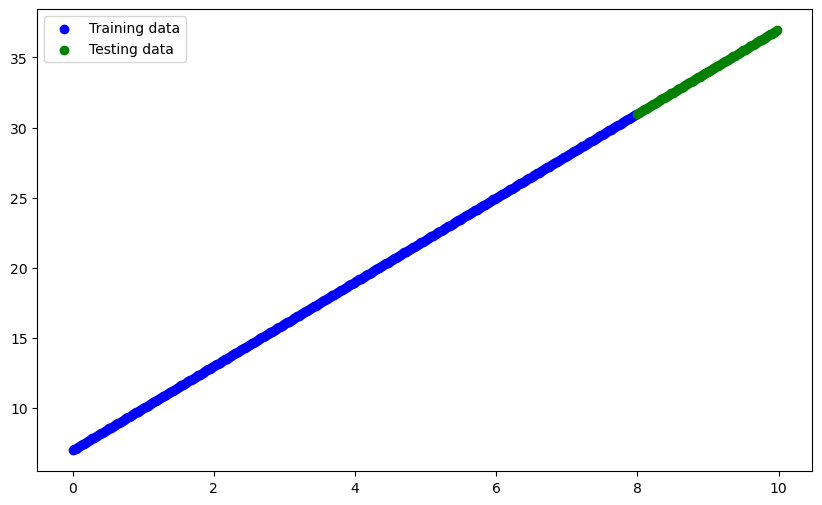

In [11]:
plot_predictions()

In [12]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features = 1, out_features = 1, bias = True)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [13]:
torch.manual_seed(42)
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [14]:
with torch.inference_mode():
    y_pred = model(x_test)

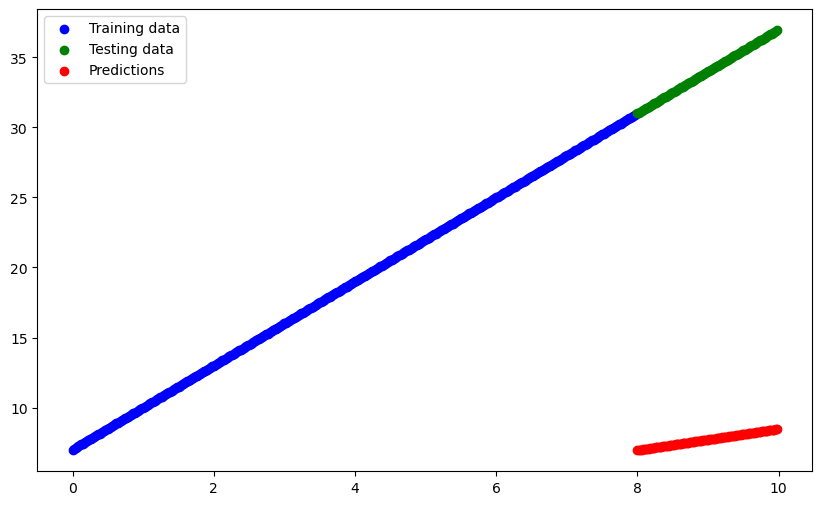

In [15]:
plot_predictions(predictions = y_pred.detach()) 

In [16]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [17]:
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

In [18]:
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

In [23]:
epochs = 10000

epoch_count = []
train_loss =[]
test_loss = []

for epoch in range(epochs):
    epoch_count.append(epoch)
    model.train()
    y_preds = model(x_train)
    loss = loss_fn(y_preds, y_train)
    train_loss.append(loss_fn(y_preds, y_train).item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    with torch.inference_mode():
        y_preds = model(x_test)
        test_loss.append(loss_fn(y_preds, y_test).item())


In [24]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[3.]], device='cuda:0')),
             ('linear_layer.bias', tensor([7.], device='cuda:0'))])

In [25]:
weight, bias

(3.0, 7.0)

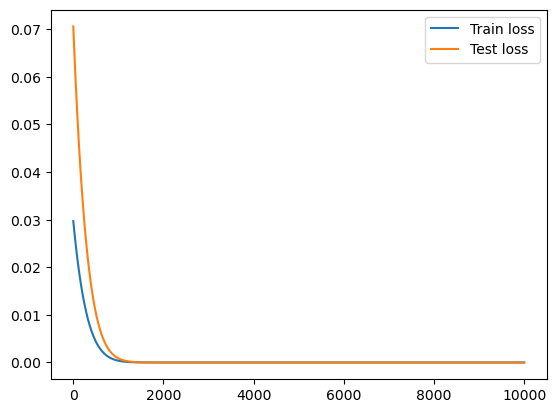

In [26]:
plt.plot(epoch_count, train_loss, label = "Train loss")
plt.plot(epoch_count, test_loss, label = "Test loss")
plt.legend()

In [32]:
with torch.inference_mode():
    y_pred = model(x_test)

y_pred = y_pred.cpu().numpy()

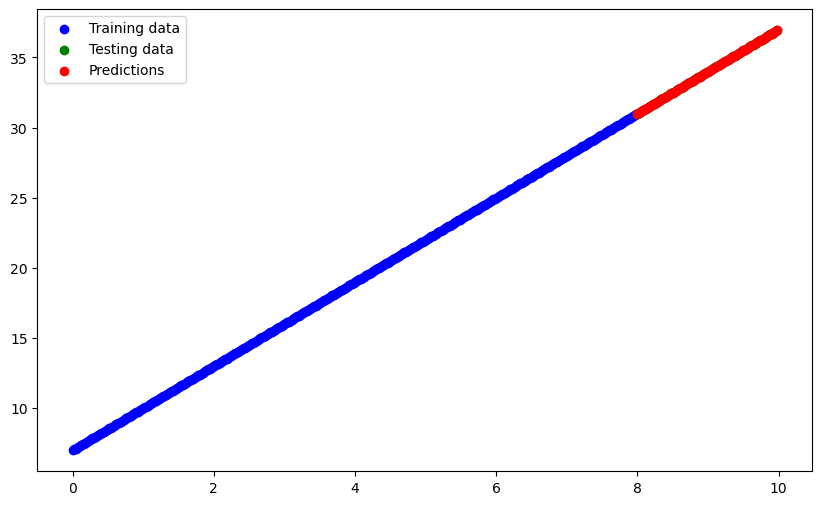

In [34]:
plot_predictions(predictions = y_pred)